<a href="https://colab.research.google.com/github/SilviaNurMahmudah/Machine-Learning/blob/main/Week6/js05_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 05 - Decision tree

> Isikan identitas berikut :

- NIM   : 2241727031
- Nama  : Silvia Nur Mahmudah
- Kelas : TI-4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep Decision Tree
2. Mahasiswa mampu menerapkan konsep Decision tree untuk klasifikasi
3. Mahasiswa mampu menerapkan konsep Decision tree untuk regresi

# Materi

## Pengertian Decision Tree

Decision tree merupakan salah satu model machine learning yang termasuk kedalam supervised learning. decision tree berbentuk seperti graph yang memodelkan keputusan. Digunakan untuk merepresentasikan keputusan dan pengambilan keputusan secara visual dan eksplisit.  Decision tree disebut juga dengan istilah CART (Classification and Regression Trees) yang diperkenalkan oleh Leo Breiman untuk merujuk pada algoritma Decision Tree yang dapat digunakan untuk masalah klasifikasi atau regresi. Algoritma CART menyediakan dasar untuk algoritma penting seperti **bagged decision trees, random forest and boosted decision trees**.

Istilah penting dalam Decision tree

![features example](assets/pic1.png)

Model decision tree adalah binary tree dimana tree tersebut terdiri dari bebrapa komponen yaitu :

* Setiap **Node** mewakili Fitur (Atribut/ variable x) pada gambar 7.1 node disimbolkan dengan persegi Panjang
* Setiap **Branch** atau **Link** atau **Edge** mewakili Keputusan atau Aturan yang disimbolkan dengan panah
* Setiap **leaf** mewakili Hasil keputusan yang merupakan output variable digunakan sabagai hasil prediksi, disimbolkan dengan bentuk elips.

Selain komponen diatas terdapat beberapa istilah yang ada dalam decision tree

* **Splitting / Pemisahan**: Ini adalah proses membagi node menjadi dua atau lebih sub-node.
* **Decision Node**: Ketika sub-node terpecah menjadi sub-node lebih lanjut, maka itu disebut node keputusan.
* **Pruning / Pemangkasan**: Saat dilakukan penghapusan sub-node dari node keputusan, proses ini disebut pemangkasan. 
* **Branch / Sub-Tree**: Sebuah sub-bagian dari seluruh pohon disebut cabang atau sub-pohon.
* **Parent and Child Node (Node Induk dan Anak)**: Node, yang dibagi menjadi beberapa sub-node disebut node induk dari sub-node sedangkan sub-node adalah anak dari node induk

Pada permasalahan klasifikasi leaf node dari decision tree mewakili kelas sedangkan pada permasalahan regresi nilai variabel respons untuk instance yang terdapat dalam leaf node dapat dirata-ratakan untuk menghasilkan estimasi untuk variabel respons. Cara untuk melakukan prediksi pada decision tree untuk data pengujian hanya perlu mengikuti edge sampai mencapai leaf node.


## Tahapan Algoritma Decision Tree

Pada Decision tree pembuatan tree merupakan Langkah awal yang harus dilaksanan. Dalam pembuatan tree diperlukan perhitungan menggunakan Information Gain ataupun Gini Index untuk menentukan Root node/ node selanjutnya. Berikut merupakah tahapan pembuatan tree secara top-down:


1. Pada iterasi pertama dilakukan pemilihan Root Node didasarkan pada Gini Indeks terendah atau Information Gain tertinggi dari keseluruhan fitur (variable x) pada data training.
2. Kemudian memisahkan himpunan S untuk menghasilkan subset data
3. Selanjut proses akan diulang untuk mencari decision node yang akan menjadi cabang selanjutnya. Penentuan decision node juga menggunakan Gini Indeks terendah atau Information Gain tertinggi. Akan tetapi yang membedakan adalah fitur yang digunakan adalah fitur yang tidak pernah menggunakan sebelum nya (subset data)
4. Algoritma terus menerus berulang pada setiap subset data hingga menemukan leaf yang merupakan label kelas


## Kegiatan Praktikum

### Persiapan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision tree untuk klasifikasi
- Classification-tree
- Urutan pertanyaan if-else tentang fitur individual.
     - **Tujuan**: menyimpulkan label kelas
     - Mampu menangkap hubungan non-linear antara fitur dan label
     - Tidak memerlukan penskalaan fitur (mis. Standardisasi)
- Decision Regions
    - Decision region: area di bagian fitur di mana semua instance ditugaskan ke satu label kelas
    - Decision Boundary: permukaan yang memisahkan area keputusan yang berbeda
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

### Proses Training - classification tree
Dalam latihan ini Anda akan melakukan training dengan data [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) dari UCI machine learning repository. latihan ini akan melakukan prediksi memprediksi apakah tumor ganas atau jinak berdasarkan dua fitur: radius rata-rata tumor (```radius_mean```) dan jumlah titik cekung rata-rata tumor (```concave points_mean```).

### Preprocess

In [ ]:
wbc = pd.read_csv('./dataset/wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Pmemprediksi label set test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


### Mengevaluasi classification tree

Sekarang Anda telah menyesuaikan classification tree selanjutnya adalah mengevaluasi kinerjanya pada set pengujian. Anda akan melakukannya menggunakan metrik akurasi yang sesuai dengan fraksi prediksi yang benar yang dibuat pada set pengujian.

In [ ]:
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


## Classification tree Learning
- Blok diagram dari Decision-Tree
    - Decision-Tree: struktur data yang terdiri dari hierarki node
    - Node: question atau prediction
    - Tiga jenis nodes
        - **Root**: tidak memiliki parent node, question memunculkan dua simpul children nodes.
        - **Internal node**: memiliki satu parent node, question memunculkan dua simpul children nodes.
        - **Leaf**: memiliki satu parent node, tidak memiliki children nodes --> prediction.
- Information Gain (IG)
![information gain](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/ig.png?raw=1)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$
    - Kriteria untuk mengukur impurity sebuah node $I(\text{node})$:
        - gini index
        - entropy
        - dst...
- Pembelajaran Classification-Tree 
    - Node bertumbuh secara rekursif.
    - Di setiap node, pisahkan data berdasarkan:
        - fitur $f$ dan split-point $sp$ untuk memaksimalkan $IG(\text{node})$.
        - jika $IG(\text{node}) = 0$, deklarasikan node daun

### Menggunakan entropi sebagai kriteria
Dalam latihan ini, Anda akan melatih classification tree pada Wisconsin Breast Cancer dataset menggunakan entropi sebagai kriteria informasi. Anda akan melakukannya menggunakan keseluruhan dari 30 fitur dalam dataset, yang dibagi menjadi 80% untuk train dan 20% untuk test.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy kedalam training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

### Entropy vs Gini index
dalam latihan ini Anda akan membandingkan akurasi set tes dt_entropy dengan akurasi tree lain yang bernama ```dt_gini```. sebuah tree ```dt_gini```dilatih pada dataset yang sama menggunakan parameter yang sama kecuali untuk kriteria informasi yang ditetapkan ke indeks gini menggunakan kata kunci ```'gini'```.

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using gini:  0.8859649122807017


## Decision tree untuk regression
- Kriteria Informasi untuk Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

### Train menggunakan regression tree
Dalam latihan ini, Anda akan melatih regression tree untuk memprediksi konsumsi bahan bakar dalam satuan *mpg* (miles per gallon) pada mobil menggunakan dataset berikut [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) dengan menggunakan keenam fitur yang tersedia.



#### Preprocess

In [ ]:
mpg = pd.read_csv('./dataset/auto.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg = pd.get_dummies(mpg)

In [ ]:
mpg.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt kedalam the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### mengevaluasi regression tree
Dalam latihan ini, Anda akan mengevaluasi kinerja set tes dari ```dt``` menggunakan metode *Root Mean Squared Error* (RMSE) metric. RMSE model mengukur rata-rata, seberapa besar prediksi model yang dihasilkan berbeda dari label yang sebenarnya. RMSE model dapat diperoleh dengan menghitung akar kuadrat dari model Mean Squared Error (MSE).



In [ ]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.68


### Linear regression vs regression tree
Dalam latihan ini, Anda akan membandingkan set tes RMSE dari ```dt``` berdasarkan pada apa yang didapat dari model regresi linier. pada jobsheet juga dibuat instance dari mode linear regression ```lr``` dan melatihnya menggunakan dataset yang sama dengan ```dt```.



#### Preprocess

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 4.07
Regression Tree test set RMSE: 3.68


## Tugas 

Lakukanlah proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Week6-DecisionTree/mushrooms.csv', encoding='latin-1')

display(data.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
display(data.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
from sklearn import preprocessing

ml = preprocessing.LabelEncoder()
for columns in data.columns:
    data[columns] = ml.fit_transform(data[columns])
    
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
x = data.iloc[:,1:23].values
y = data.iloc[:,0].values
y = y.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7, random_state=3)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=3)

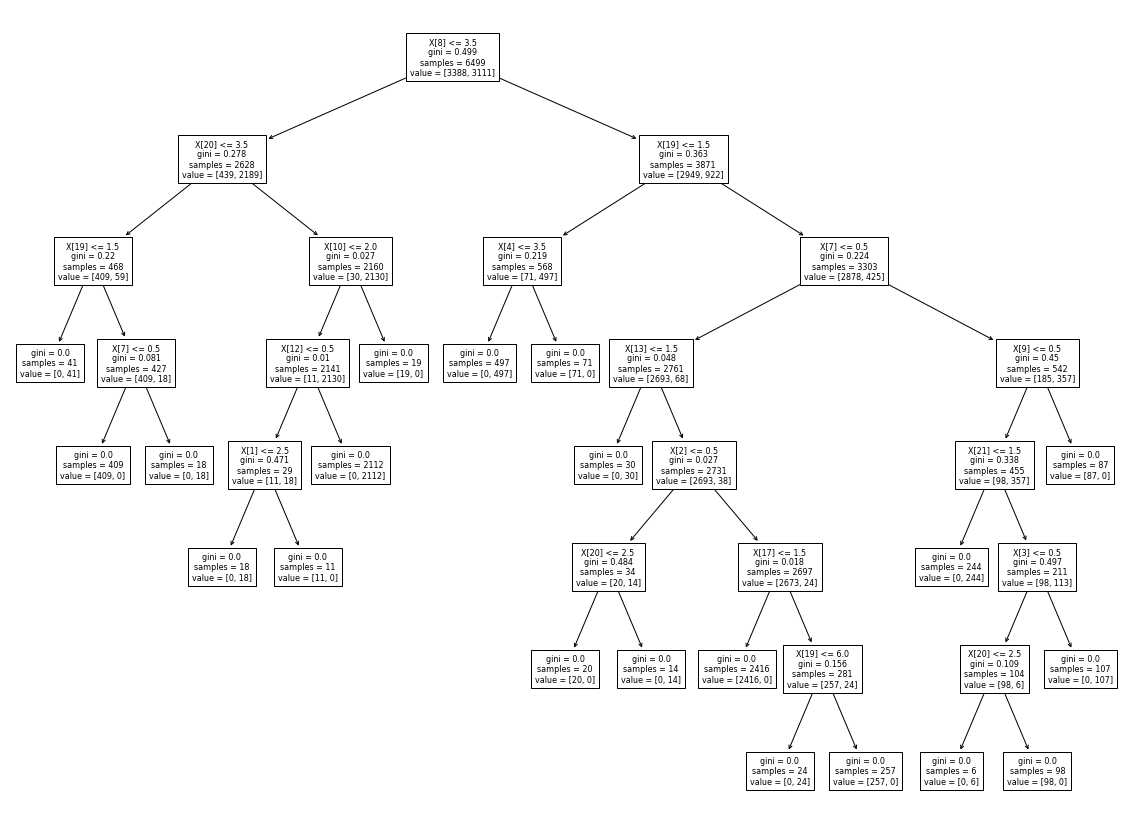

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dt.fit(x_train, y_train), fontsize=8)
plt.show()

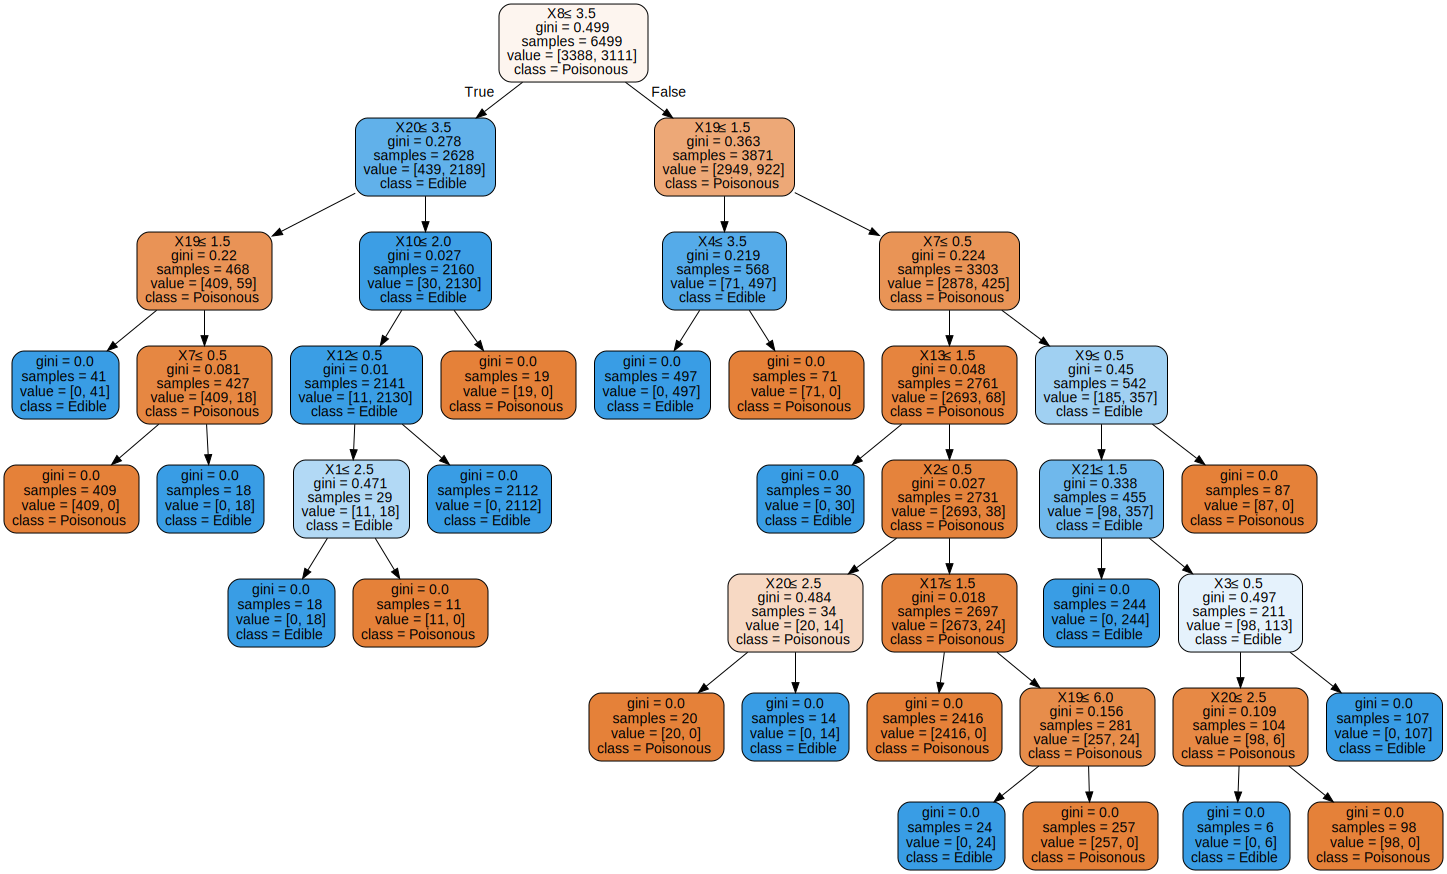

In [ ]:
import graphviz

dot_data = tree.export_graphviz(
    dt.fit(x_train, y_train), 
    out_file=None,
    class_names=['Poisonous', 'Edible'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_pred = dt.predict(x_test)
print(y_pred[0:5])

[0 1 1 1 0]


In [ ]:
def inverse_label(e):
    return 'Poisonous' if e == 1 else 'Edible'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

['Edible' 'Poisonous' 'Poisonous' 'Poisonous' 'Edible']


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy GINI: {:.2f}".format(acc))

Test set accuracy GINI: 1.00


In [ ]:
dt_entropy = DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=1)
dt_entropy.fit(x_train, y_train)
# menggunakan dt_entropy untuk memprediksi test set labels
y_pred_entropy = dt_entropy.predict(x_test)
# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
print("Test set accuracy ENTROPY: {:.2f}".format(accuracy_entropy))

Test set accuracy ENTROPY: 1.00
